# Advanced Lane Finding Project
The steps of this project are the following:
* 1: Camera calibration
* 2: Color and gradient threshold
* 3: Birds eye view
* 4: Lane detection and fit
* 5: Curvature of lanes and vehicle position with respect to center
* 6: Warp back and display information
* 7: Full pipeline to work on video

# Step 1: Camera calibration

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
#%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
print(images)

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    print(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(10)
        
        cv2.destroyAllWindows()

['camera_cal/calibration1.jpg', 'camera_cal/calibration10.jpg', 'camera_cal/calibration11.jpg', 'camera_cal/calibration12.jpg', 'camera_cal/calibration13.jpg', 'camera_cal/calibration14.jpg', 'camera_cal/calibration15.jpg', 'camera_cal/calibration16.jpg', 'camera_cal/calibration17.jpg', 'camera_cal/calibration18.jpg', 'camera_cal/calibration19.jpg', 'camera_cal/calibration2.jpg', 'camera_cal/calibration20.jpg', 'camera_cal/calibration3.jpg', 'camera_cal/calibration4.jpg', 'camera_cal/calibration5.jpg', 'camera_cal/calibration6.jpg', 'camera_cal/calibration7.jpg', 'camera_cal/calibration8.jpg', 'camera_cal/calibration9.jpg']
camera_cal/calibration1.jpg
camera_cal/calibration10.jpg
camera_cal/calibration11.jpg
camera_cal/calibration12.jpg
camera_cal/calibration13.jpg
camera_cal/calibration14.jpg
camera_cal/calibration15.jpg
camera_cal/calibration16.jpg
camera_cal/calibration17.jpg
camera_cal/calibration18.jpg
camera_cal/calibration19.jpg
camera_cal/calibration2.jpg
camera_cal/calibration

In [2]:
#Camera calibration matrices
img = cv2.imread("camera_cal/calibration2.jpg")
img_size = (img.shape[1], img.shape[0])
print(img_size)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

(1280, 720)


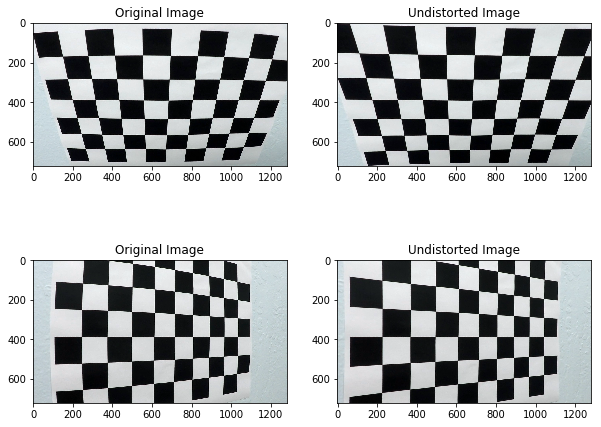

In [3]:
#Examples of undistorted image
%matplotlib inline
plt.figure(figsize=(10,8))

img = cv2.imread("camera_cal/calibration2.jpg")
img2 = cv2.undistort(img, mtx, dist, None, mtx)
plt.subplot(2,2,1)
plt.title('Original Image')
fig =plt.imshow(img)

plt.subplot(2,2,2)
plt.title('Undistorted Image')
fig =plt.imshow(img2)


img = cv2.imread("camera_cal/calibration5.jpg")
img2 = cv2.undistort(img, mtx, dist, None, mtx)
plt.subplot(2,2,3)
plt.title('Original Image')
fig =plt.imshow(img)

plt.subplot(2,2,4)
plt.title('Undistorted Image')
fig =plt.imshow(img2)

## Example of undistorted images

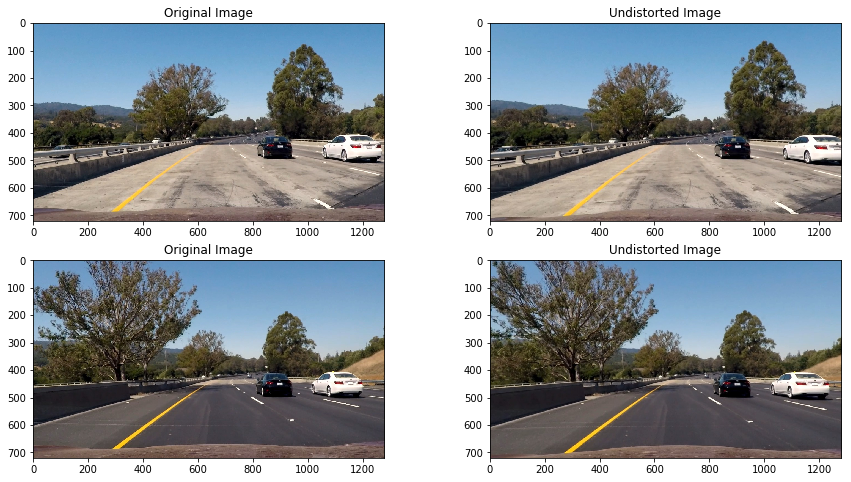

In [4]:
plt.figure(figsize=(15,8))

img = cv2.imread("test_images/test1.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.undistort(imgRGB, mtx, dist, None, mtx)
plt.subplot(2,2,1)
plt.title('Original Image')
fig =plt.imshow(imgRGB)

plt.subplot(2,2,2)
plt.title('Undistorted Image')
fig =plt.imshow(img2)


img = cv2.imread("test_images/test6.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.undistort(imgRGB, mtx, dist, None, mtx)

plt.subplot(2,2,3)
plt.title('Original Image')
fig =plt.imshow(imgRGB)

plt.subplot(2,2,4)
plt.title('Undistorted Image')
fig =plt.imshow(img2)

# Step 2: Color and gradient threshold

In [5]:
def hls_select(img, thresh=(230, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    S = hls[:,:,2]
    binary_output = np.zeros_like(S)
    binary_output[(S > thresh[0]) & (S <= thresh[1])] = 1
    return binary_output

## Example S-channel filter

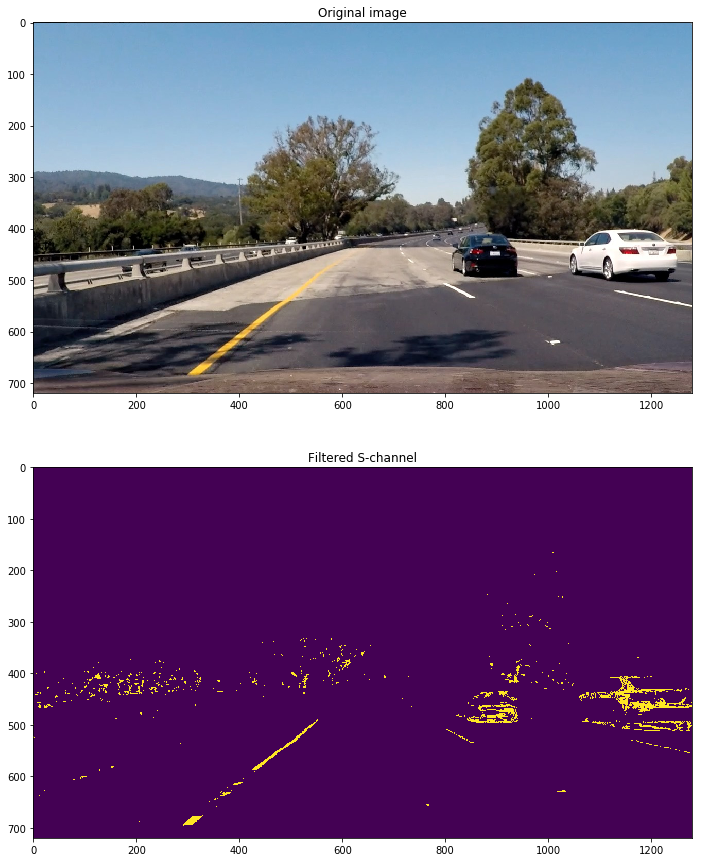

In [7]:
img = cv2.imread("test_images/test4.jpg")
img_undist = cv2.undistort(img, mtx, dist, None, mtx)
img_filtered = hls_select(img_undist)

plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.title('Original image')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.imshow(imgRGB)

plt.subplot(2,1,2)
plt.title('Filtered S-channel')
fig =plt.imshow(img_filtered)

In [8]:
def abs_sobel_x(img, thresh=(20, 100)):  
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_output

## Example sobel x filter

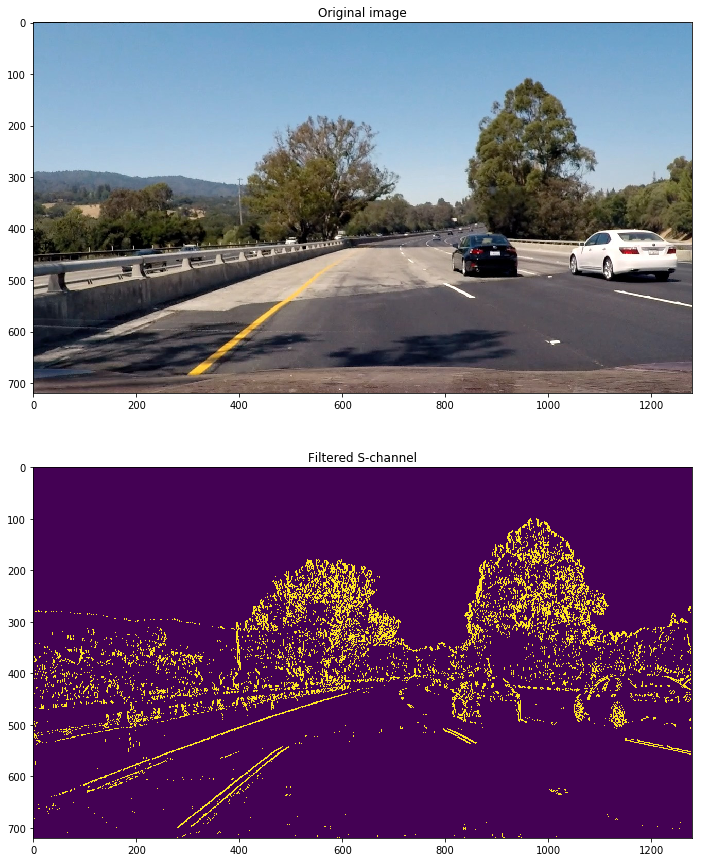

In [9]:
img = cv2.imread("test_images/test4.jpg")
img_undist = cv2.undistort(img, mtx, dist, None, mtx)
img_filtered = abs_sobel_x(img_undist)

plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.title('Original image')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.imshow(imgRGB)

plt.subplot(2,1,2)
plt.title('Filtered S-channel')
fig =plt.imshow(img_filtered)

In [34]:
def filter_pipeline_single_image(img, s_thresh=(185, 255), sx_thresh=(40, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HLS).astype(np.float)
    s_channel = hsv[:,:,2]
    
    # Sobel x
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1

    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

    binary_output = np.zeros_like(sxbinary)
    binary_output[((scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])) | ((s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1]))] = 1
    return binary_output
    

## Example filters applied together

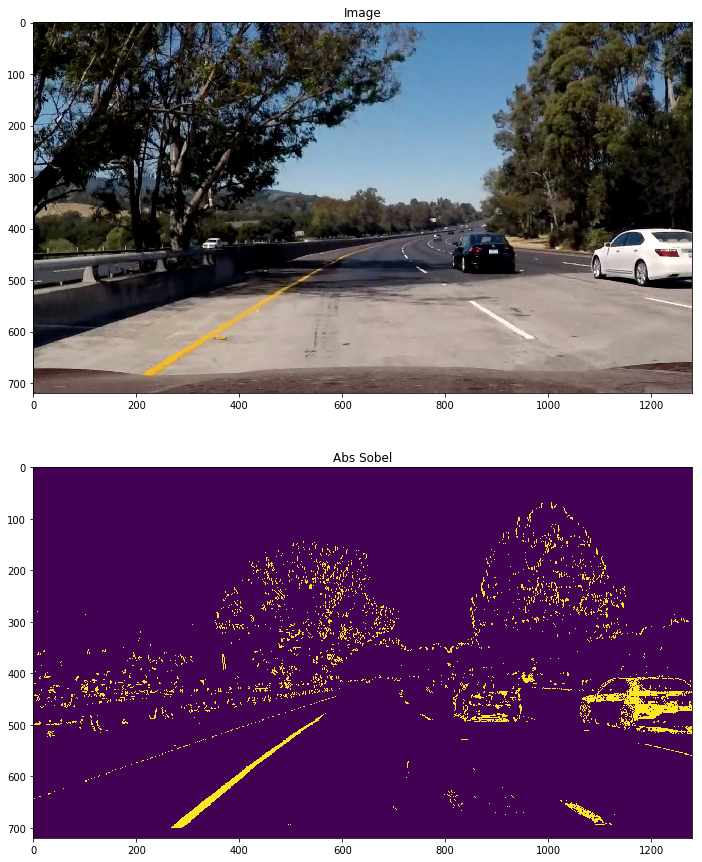

In [35]:
img = cv2.imread("test_images/test1.jpg")

img_undist = cv2.undistort(img, mtx, dist, None, mtx)
img2 = filter_pipeline_single_image(img_undist)

plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.title('Image')
fig = plt.imshow(imgRGB)

plt.subplot(2,1,2)
plt.title('Abs Sobel')
fig =plt.imshow(img2)

# Step 3: Birds eye view

| From       | To         |
|------------|------------|
| (585,455)  | (300,0)    |
| (705,455)  | (1000,0)   |
| (1180,720) | (1000,720) |
| (190,720)  | (300,720)  |

In [36]:
src = np.float32([[585, 455], [705, 455], [1180, 720], [190, 720]])
dst = np.float32([[300, 0], [1000, 0], [1000,720], [300, 720]])
#src = np.float32([[585, 460], [696, 460], [1127, 720], [203, 720]])
#dst = np.float32([[320, 0], [960, 0], [960,720], [320, 720]])

M_persp = cv2.getPerspectiveTransform(src, dst)
Minv_persp = cv2.getPerspectiveTransform(dst, src)

## Example of Birds eye view

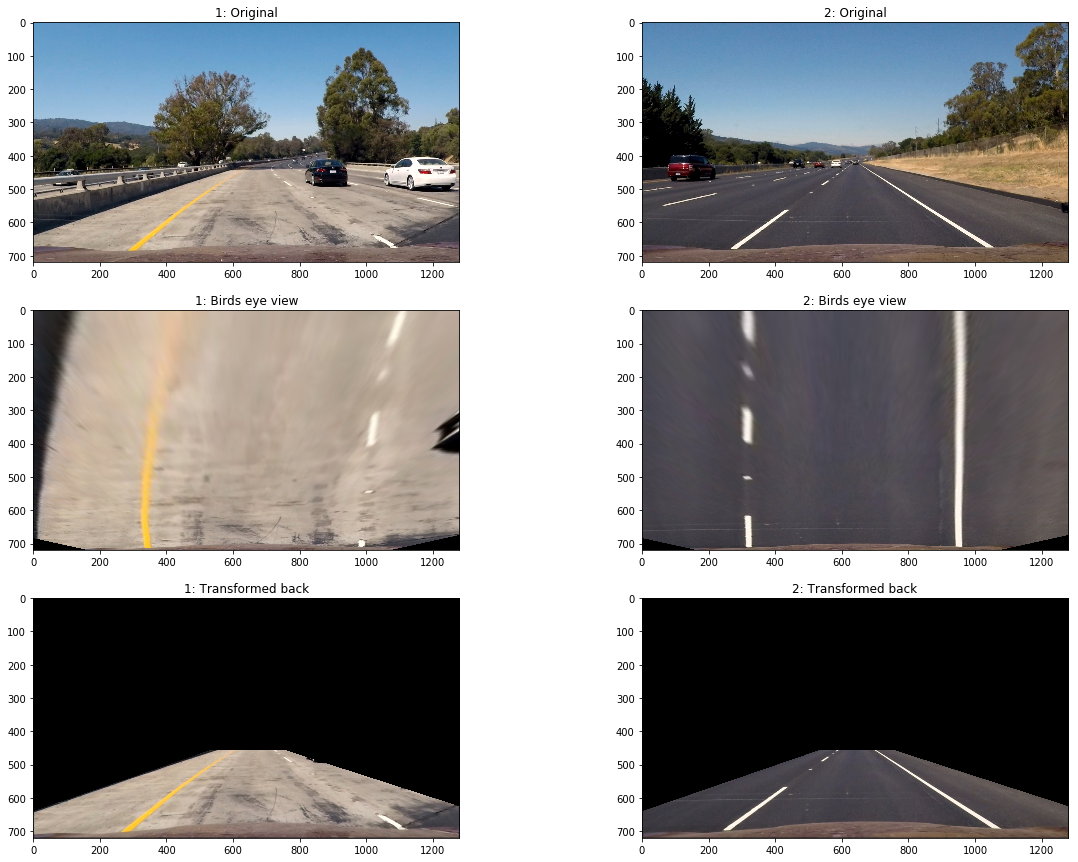

In [37]:
img1 = cv2.imread("test_images/test1.jpg")
img2 = cv2.imread("test_images/straight_lines2.jpg")

imgRGB1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_undist1 = cv2.undistort(imgRGB1, mtx, dist, None, mtx)
imgRGB2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_undist2 = cv2.undistort(imgRGB2, mtx, dist, None, mtx)

img_size1 = (img1.shape[1], img1.shape[0])
img_size2 = (img2.shape[1], img2.shape[0])

img1_warped = cv2.warpPerspective(img_undist1, M_persp, img_size1, flags=cv2.INTER_LINEAR)
img2_warped = cv2.warpPerspective(img_undist2, M_persp, img_size2, flags=cv2.INTER_LINEAR)


plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('1: Original')
fig =plt.imshow(imgRGB1)

plt.subplot(3,2,3)
plt.title('1: Birds eye view')
fig =plt.imshow(img1_warped)

img_unpersp1 = cv2.warpPerspective(img1_warped, Minv_persp, img_size1, flags=cv2.INTER_LINEAR)
plt.subplot(3,2,5)
plt.title('1: Transformed back')
fig =plt.imshow(img_unpersp1)

plt.subplot(3,2,2)
plt.title('2: Original')
fig =plt.imshow(imgRGB2)

plt.subplot(3,2,4)
plt.title('2: Birds eye view')
fig =plt.imshow(img2_warped)

img_unpersp2 = cv2.warpPerspective(img2_warped, Minv_persp, img_size2, flags=cv2.INTER_LINEAR)
plt.subplot(3,2,6)
plt.title('2: Transformed back')
fig =plt.imshow(img_unpersp2)

## Example of full pipeline so far

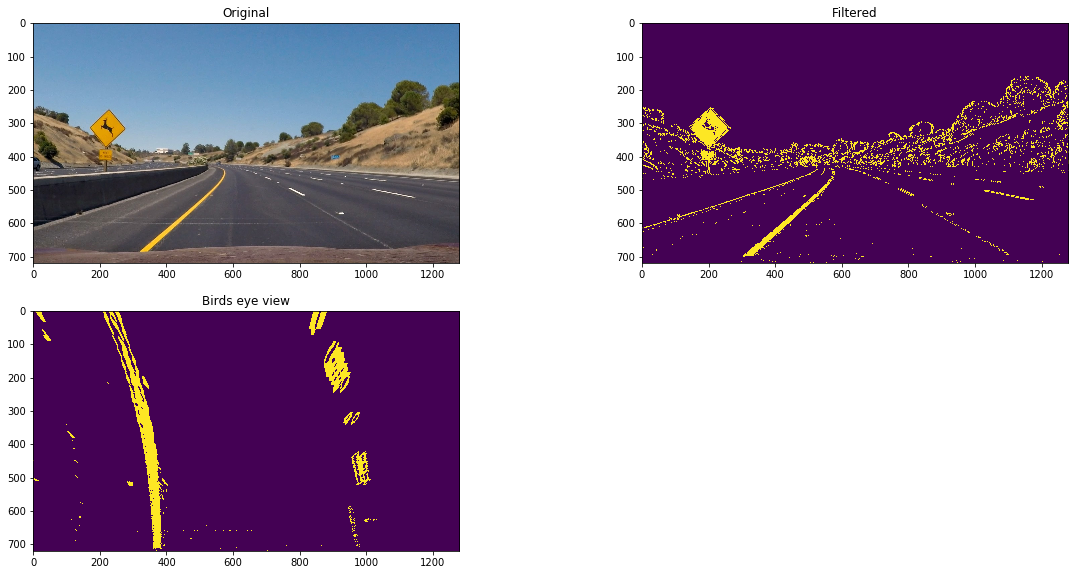

In [38]:
img = cv2.imread("test_images/test2.jpg")
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_undist = cv2.undistort(img, mtx, dist, None, mtx)
img_filtered = filter_pipeline_single_image(img_undist, s_thresh=(230, 255), sx_thresh=(20, 100))

img_size = (img.shape[1], img.shape[0])

img_warped = cv2.warpPerspective(img_filtered, M_persp, img_size, flags=cv2.INTER_LINEAR)


plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Original')
fig =plt.imshow(img_RGB)

plt.subplot(3,2,2)
plt.title('Filtered')
fig =plt.imshow(img_filtered)

plt.subplot(3,2,3)
plt.title('Birds eye view')
fig =plt.imshow(img_warped)

# Step 4: Lane detection and fit

leftx_base 360 rightx_base 981


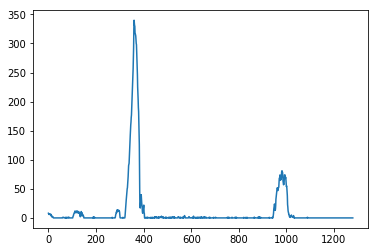

In [39]:
histogram = np.sum(img_warped[img_warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)

midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

print("leftx_base",leftx_base, "rightx_base",rightx_base)

In [40]:
def fitlines(binary_warped):
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
   
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    nwindows = 9
    window_height = np.int(binary_warped.shape[0]/nwindows)
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    leftx_current = leftx_base
    rightx_current = rightx_base
    margin = 100
    minpix = 50
    left_lane_inds = []
    right_lane_inds = []

    for window in range(nwindows):
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    
    
    # Fit a second order polynomial to each
    if len(leftx) == 0:
        left_fit =[]
    else:
        left_fit = np.polyfit(lefty, leftx, 2)
    
    if len(rightx) == 0:
        right_fit =[]
    else:
        right_fit = np.polyfit(righty, rightx, 2)
       
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    return left_fit, right_fit,out_img

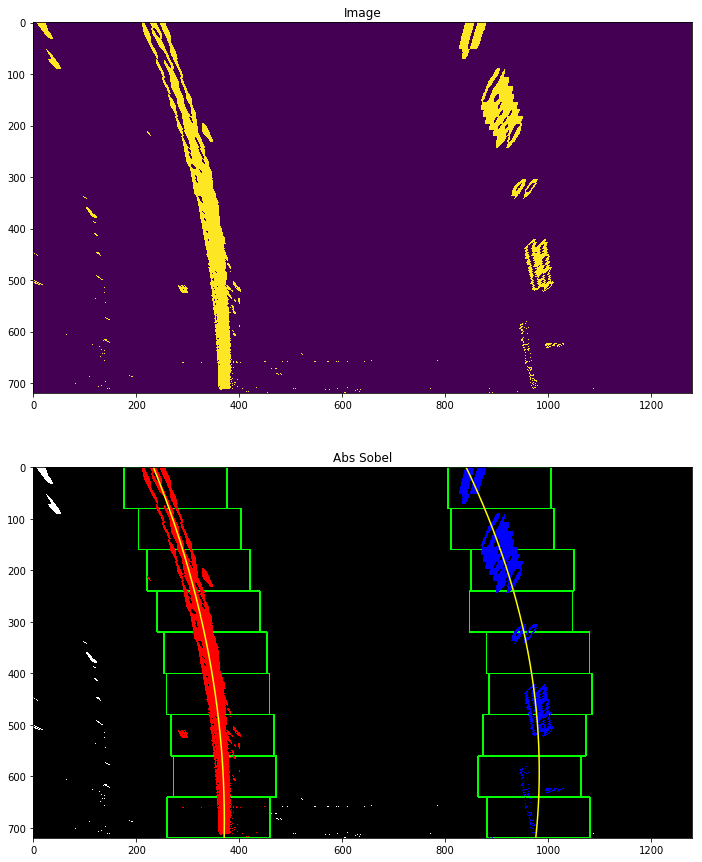

In [41]:
left_fit, right_fit,out_img = fitlines(img_warped)
ploty = np.linspace(0, img_warped.shape[0]-1, img_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    

plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.title('Image')
fig = plt.imshow(img_warped)

plt.subplot(2,1,2)
plt.title('Abs Sobel')
fig =plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')

# Step 5: Curvature of lanes and vehicle position with respect to center

In [42]:
def curvature(left_fit, right_fit, binary_warped):
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    y_eval = np.max(ploty)
    
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    left_curverad = ((1 + (2*left_fit[0]*y_eval*ym_per_pix + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval*ym_per_pix + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    center = (((left_fit[0]*720**2+left_fit[1]*720+left_fit[2]) +(right_fit[0]*720**2+right_fit[1]*720+right_fit[2]) ) /2 - 640)*xm_per_pix
    
    return left_curverad, right_curverad, center

In [43]:
def drawLine(undist, warped,left_fit, right_fit):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )
    # Fit new polynomials to x,y in world space
    left_fitx = left_fit[0]*ploty**2+left_fit[1]*ploty+left_fit[2]
    right_fitx = right_fit[0]*ploty**2+right_fit[1]*ploty+right_fit[2] 
    
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    cv2.fillPoly(color_warp, np.int_([pts]), (255,215, 0))
    
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv_persp, (color_warp.shape[1], color_warp.shape[0])) 

    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    return(result, color_warp)

# Step 6: Warp back and display information

# Step 7: Full pipeline to work on video

In [44]:
def sanity_check(left_fit, right_fit, minSlope, maxSlope):
    #Performs a sanity check on the lanes
    #Check 1: check if left and right fits exists
    #Check 2: Calculates the tangent between left and right in two points, and check if it is in a reasonable threshold
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    if len(left_fit) ==0 or len(right_fit) == 0:
        status = False
        d0=0
        d1=0
        #Previous fitlines routine returns empty list to them if not finds
    else:
        #Difference of slope
        L_0 = 2*left_fit[0]*460+left_fit[1]
        R_0 = 2*right_fit[0]*460+right_fit[1]
        d0 =  np.abs(L_0-R_0)

        L_1 = 2*left_fit[0]*720+left_fit[1]
        R_1 = 2*right_fit[0]*720+right_fit[1]
        d1 =  np.abs(L_1-R_1)

        
        if d0>= minSlope and d0<= maxSlope and d1>= minSlope and d1<= maxSlope:
            status = True
        else:
            status = False
            
    return(status, d0, d1)

In [45]:
def process_image(img):
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_undist = cv2.undistort(img, mtx, dist, None, mtx)
    img_filtered = filter_pipeline_single_image(img_undist)

    img_size = (img.shape[1], img.shape[0])
    ref_left, ref_right, left_fit, right_fit = None, None, None, None
    
    
    
    counter = 0

    img_warped = cv2.warpPerspective(img_filtered, M_persp, img_size, flags=cv2.INTER_LINEAR)
    
    left_fit, right_fit, out_imgfit = fitlines(img_warped)
        
    left_curv, right_curv, center_off = curvature(left_fit, right_fit, img_warped)
    
    if counter==0:
        ref_left, ref_right = left_fit, right_fit        
        counter+=1
    else:
        status_sanity, d0, d1 =sanity_check(left_fit, right_fit, 0, .55)
        if status_sanity  == True:        
            ref_left, ref_right = left_fit, right_fit        
            counter+=1
        else:
            left_fit, right_fit = ref_left, ref_right

    #Warp back to original and merge with image    
    img_merge, img_birds = drawLine(img_undist, img_warped,left_fit, right_fit)

    #Composition of images to final display
    #img_out=np.zeros((576,1280,3), dtype=np.uint8)

    #img_out[0:576,0:1024,:] =cv2.resize(img_merge,(1024,576))
    
    #b) Threshold
    #img_out[0:288,1024:1280, 0] =cv2.resize(img_filtered*255,(256,288))
    #img_out[0:288,1024:1280, 1] =cv2.resize(img_filtered*255,(256,288))
    #img_out[0:288,1024:1280, 2] =cv2.resize(img_filtered*255,(256,288))
    
    #c)Birds eye view
    #img_out[310:576,1024:1280,:] =cv2.resize(img_birds,(256,266))

    img_out = img_merge
    
    #Write curvature and center in image
    TextL = "Left curv: " + str(int(left_curv)) + " m"
    TextR = "Right curv: " + str(int(right_curv))+ " m"
    TextC = "Center offset: " + str(round( center_off,2)) + "m"
    #TextAux = str(status_sanity) + ", d0: " + str(round(d0,2)) + ", d1: " + str(round(d1,2))
    fontScale=1
    thickness=2
    
    fontFace = cv2.FONT_HERSHEY_SIMPLEX


    cv2.putText(img_out, TextL, (500,40), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)
    cv2.putText(img_out, TextR, (500,70), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)
    cv2.putText(img_out, TextC, (500,100), fontFace, fontScale,(255,255,255), thickness,  lineType = cv2.LINE_AA)

    #cv2.putText(img_out, "Thresh. view", (1070,30), fontFace, .8,(200,200,0), thickness,  lineType = cv2.LINE_AA)
    #cv2.putText(img_out, "Birds-eye", (1080,305), fontFace, .8,(200,200,0), thickness,  lineType = cv2.LINE_AA)
        
    
    #return img_out, binary_warped, left_curv, right_curv, left_fit, right_fit   
    return img_out

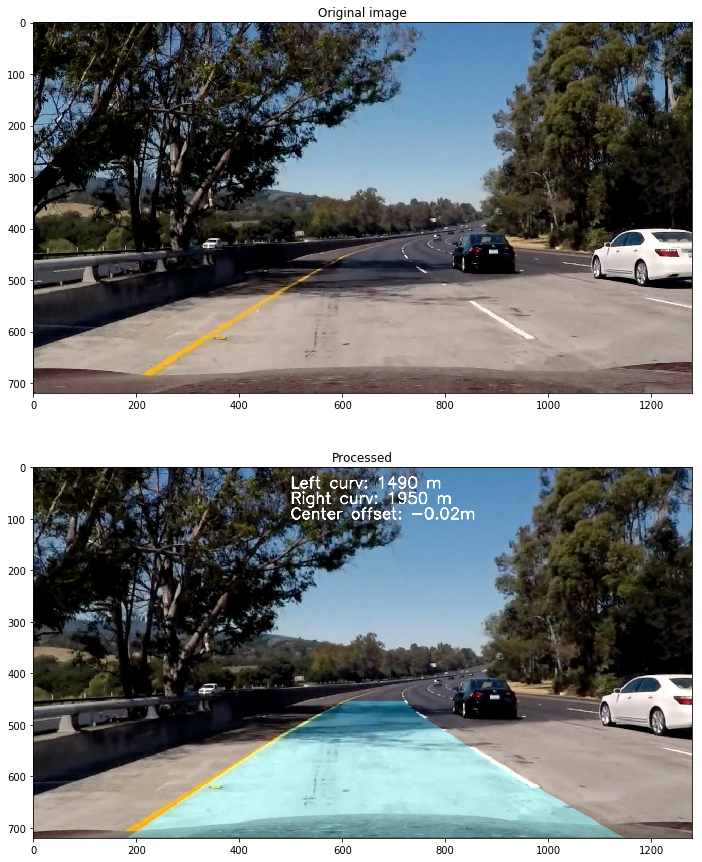

In [46]:
img = cv2.imread("test_images/test5.jpg")
img_processed = process_image(img)

plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
plt.title('Original image')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.imshow(imgRGB)

plt.subplot(2,1,2)
plt.title('Processed')
imgRGB_processed = cv2.cvtColor(img_processed, cv2.COLOR_BGR2RGB)
fig =plt.imshow(imgRGB_processed)

In [47]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
project_output = 'project.mp4'

#clip_project = VideoFileClip("project_video.mp4").subclip(40.8,42)
clip_project = VideoFileClip("project_video.mp4")
project_clip = clip_project.fl_image(process_image)
%time project_clip.write_videofile(project_output, audio=False)

[MoviePy] >>>> Building video project.mp4
[MoviePy] Writing video project.mp4


100%|█████████▉| 1260/1261 [03:17<00:00,  7.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project.mp4 

CPU times: user 3min 22s, sys: 52.3 s, total: 4min 14s
Wall time: 3min 18s


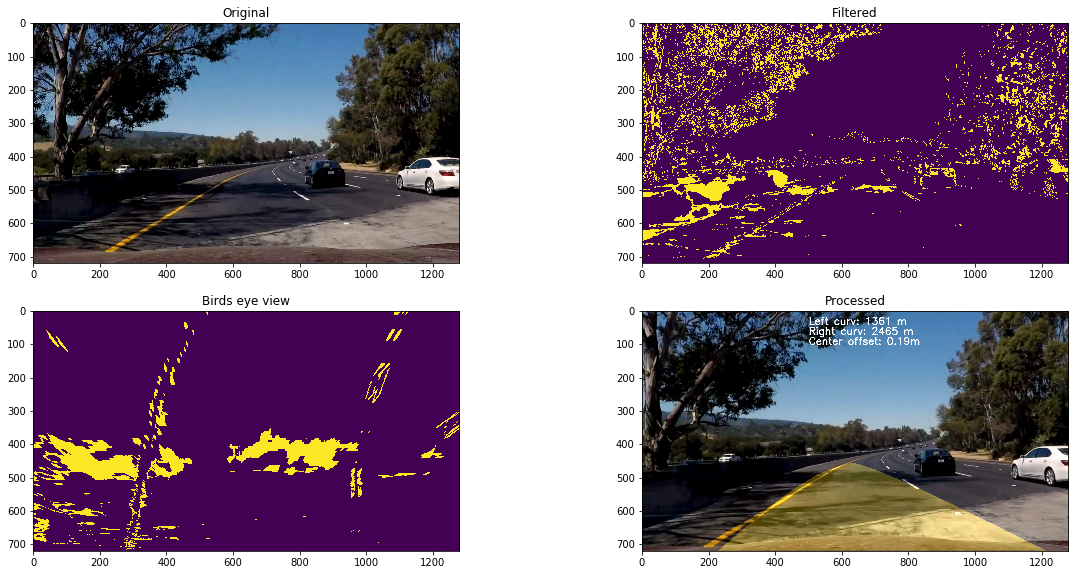

In [48]:
img = VideoFileClip("project_video.mp4").get_frame(41.5)
#img = VideoFileClip("project_video.mp4").get_frame(23.0)

img_undist = cv2.undistort(img, mtx, dist, None, mtx)
img_filtered = filter_pipeline_single_image(img_undist, s_thresh=(200, 255), sx_thresh=(40, 100))
img_size = (img.shape[1], img.shape[0])

img_warped = cv2.warpPerspective(img_filtered, M_persp, img_size, flags=cv2.INTER_LINEAR)


plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Original')
fig =plt.imshow(img)

plt.subplot(3,2,2)
plt.title('Filtered')
fig =plt.imshow(img_filtered)

plt.subplot(3,2,3)
plt.title('Birds eye view')
fig =plt.imshow(img_warped)

processed = process_image(img)

plt.subplot(3,2,4)
plt.title('Processed')
fig =plt.imshow(processed)

